<a href="https://colab.research.google.com/github/Gau-6426/NHAPMONPHANTICHDULIEUHOCSAU/blob/main/Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **PHẦN 1: DATA CLEANSING & FEATURE ENGINEERING Hướng dẫn**

1. Viết hàm load_data() để tải dữ liệu lên ứng dụng.Sau đó, hiển thị ra màn hình 10 dòng đầu tiên.
2. Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heat map). Hãy cho nhận xét về tình trạng thiếu dữ liệu Age, Cabin và Embarked
3. Xử lý tên cột tên Name, tách ra làm 2 cột: firstName và secondName. Lưu ý: Sau khi tách cột xong thì xóa luôn cột Name
4. Xứ lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male -> M và female -> F
5. Xử lý dữ liệu thiếu trên biến Age bằng cách thay thế bằng giá trị trung bình tuổi: Hãy đưa ra quyết định dùng giá trị trung bình tuổi toàn bộ hành khách hay theo từng nhóm hạng vé (hạng hành khách: Pclass). Ta tiến hành làm các bước sau:

 a. Sử dụng Seaborn để vẽ biểu đồ (Box plot) trực quan dữ liệu để xác định phân
 phối tuổi trên từng hạng hành khách. Nhận xét về tuổi trung bình giữa các nhóm
 hành khách. Từ đó đưa ra quyết định cách thay thế giá trị tuổi bị thiếu.

 b. Tiến hành thay thế giá trị Age bị thiếu. Sau đó, hiển thị kết quả dạng bảng và trực quan dữ liệu đã xử lý thiếu cho cột‘Age‘ bằng biểu đồ Heat map.
6. Xây dựng biến số Agegroup có thang đo thứ tự được ánh xạ theo thang đo khoảng dựa trên độ tuổi của hành khách như sau: (age =< 12]  Kid; (12, 18]: Teen, (18, 60]: Adult và ( age > 60): Older
7. Tiến hành thêm đặc trưng về danh xưng (namePrefix) trong xã hội bằng cách tách Mr, Mrs, Miss, Master ra khỏi "secondName"
8. Khai thác thêm thông tin số lượng thành viên đi theo nhóm thân quen (familySize) đối với mỗi hành khách trên chuyến hải trình; family size = 1+ SibSp + Parch
9. Tạo thêm đặc trưng ‗Alone‘ để xác định hành khách đi theo nhóm hay cá nhân bằng cách dựa trên familySize như sau: Nếu familySize = 0 thì giá trị Alone = 1 và ngược lại là 0.
10. Tiến hành tách loại cabin (typeCabin) mà hành khách ở để lọc và phân tích đặc tính cabin. Loại cabin được kí hiệu bởi chữ cái đầu tiên. Lưu ý: Đối với dữ liệu cabin bị thiếu thì thay thế bằng ―Unknown‖
11. Loại bỏ dữ liệu thừa đối với các hành khách xuất hiện trong cả 2 tập dữ liệu huấn luyện (train.csv) và đánh giá (test.csv). Ưu tiên giữ lại dữ liệu trong tập huấn luyện.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [23]:
#Viết hàm load_data() để tải dữ liệu lên ứng dụng.Sau đó, hiển thị ra màn hình 10 dòng đầu tiên.
def load_data(filename)
  return pd.read_csv ('https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/titanic_disaster.csv'+ filename)
df_titanic=pd.read_csv('titanic_disaster.csv')
df_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [29]:
#Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heat map). Hãy cho nhận xét về tình trạng thiếu dữ liệu Age, Cabin và Embarked
df_titanic_NaN = df_titanic[df_titanic.isna().any(axis=1)]
df_titanic_NaN.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


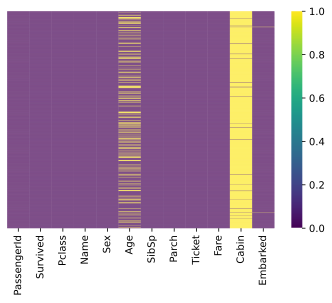

In [31]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.heatmap(df_titanic_NaN.isna(), 
            yticklabels=False, 
            cbar=True, 
            cmap='viridis')

In [33]:
#Xử lý tên cột tên Name, tách ra làm 2 cột: firstName và secondName. Lưu ý: Sau khi tách cột xong thì xóa luôn cột Name
df_titanic[['Firstname', 'secondName']]=df_titanic['Name'].str.split(",",expand = True)
df_titanic = df_titanic.drop('Name',axis=1)
df_titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Firstname,secondName
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,Montvila,Rev. Juozas
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,Graham,Miss. Margaret Edith
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,"Miss. Catherine Helen ""Carrie"""
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,Behr,Mr. Karl Howell


In [34]:
#4. Xứ lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male -> M và female -> F
df_titanic['Sex'].replace({'male':'M','female':'F'},inplace=True)
df_titanic.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Firstname,secondName
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


In [37]:
#5. Xử lý dữ liệu thiếu trên biến Age bằng cách thay thế bằng giá trị trung bình tuổi: Hãy đưa ra quyết định dùng giá trị trung bình tuổi toàn bộ hành khách hay theo từng nhóm hạng vé (hạng hành khách: Pclass). Ta tiến hành làm các bước sau:

 #   a. Sử dụng Seaborn để vẽ biểu đồ (Box plot) trực quan dữ liệu để xác định phân
 #  phối tuổi trên từng hạng hành khách. Nhận xét về tuổi trung bình giữa các nhóm
 #   hành khách. Từ đó đưa ra quyết định cách thay thế giá trị tuổi bị thiếu.

 #  b. Tiến hành thay thế giá trị Age bị thiếu. Sau đó, hiển thị kết quả dạng bảng và trực
 #   quan dữ liệu đã xử lý thiếu cho cột‘Age‘ bằng biểu đồ Heat map.

 sns.boxplot(y='Age', x='Pclass', df = df_titanic)

IndentationError: ignored